# Advanced Algorithms and Parallel Programming
## Summer Session Project on Advanced Algorithms
## Student: Samuel Polo - 10670388

# WD and OPT1 Notebook

In [1]:
import graph_tool.all as gt
import numpy as np

# Test Case No.1 Correlator example from the Reference Paper

<Graph object, directed, with 8 vertices and 11 edges, 1 internal vertex property, 1 internal edge property, at 0x7f1eabc3e940>


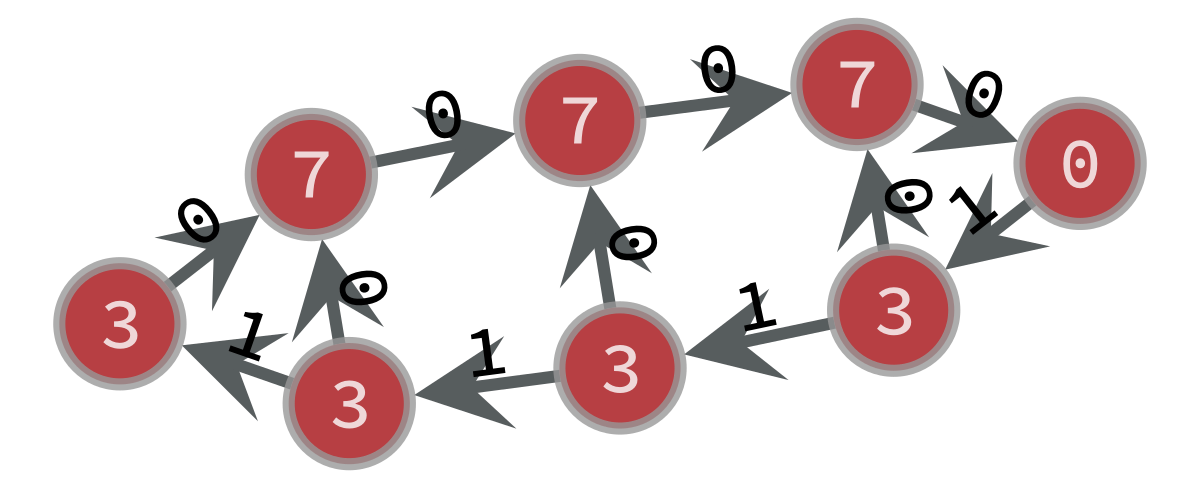

Vertex 0 with capacity: 0
Vertex 1 with capacity: 3
Vertex 2 with capacity: 3
Vertex 3 with capacity: 3
Vertex 4 with capacity: 3
Vertex 5 with capacity: 7
Vertex 6 with capacity: 7
Vertex 7 with capacity: 7
cap            (vertex)  (type: int32_t)
weight         (edge)    (type: double)
None


In [2]:
g = gt.Graph()

edge_weight = g.new_edge_property("double")
g.edge_properties["weight"] = edge_weight
edge_str_weight = g.new_edge_property("string")

vlist = g.add_vertex(8) #Creation of vertices. Array of Vertices 

edges = [[0,1],[1,7],[1,2],[2,6],[2,3],[3,4],[3,5],[4,5],[5,6],[6,7],[7,0]] #array of Edges 

nodeCapacity = [0,3,3,3,3,7,7,7] #Aka "d(node_i)" #Array d(v) in the paper (Propagation delay)

cap = g.new_vertex_property("int")

weights = [1,0,1,0,1,1,0,0,0,0,0,0] #array of weights "w" (Register count) 
#print(edges[0][1])

for i in range(len(list(vlist))):
    #g.vp.cap[g.vertex(i)] = nodeCapacity[i] //Documentation Bug
    cap[i] = nodeCapacity[i]

g.vertex_properties["cap"] = cap    #Array d(v) in the paper (Propagation delay)

for i in range(len(edges)):
    e = g.add_edge(edges[i][0], edges[i][1])
    #randomNumber = np.random.randint(10)
    g.ep.weight[e] = weights[i]
    edge_str_weight[e] = str(weights[i])
    
print(g)
gt.graph_draw(g, vertex_text=g.vp.cap, edge_text=edge_str_weight)

#for e in g.edges():
    #print(edge_weight[e])

for v in g.vertices():
    print("Vertex %s with capacity: %s" % (v, g.vp.cap[v]))
    
print(g.list_properties())

# OPT1 Algorithm

## Compute WD Algorithm

In [3]:
W = np.zeros((8,8)) #Initialize W Matrix
D = np.zeros((8,8)) #Initialize D Matrix
print(W)
print(D)
#for i in range(8):
#    W[i][i] = -1

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


## Computing W and D Matrix

In [4]:
g2 = gt.Graph(g) #Copy the graph to perform other operations

ordered_pair = g2.new_edge_property("vector<int>")
g2.edge_properties["weight_pair"] = ordered_pair

for edge in g2.edges():
    g2.ep.weight_pair[edge] = [g.ep.weight[edge], g.vp.cap[edge.source()]*(-1)]
    
for i in range(g.num_vertices()):
    for j in range(g.num_vertices()):
        if (i!=j): #Exclude the same node path calculation and DSum
            #Calculate the total weight of the path we just got.
            path = gt.shortest_path(g2, i, j)
            weightSum = [0,0] #Ordered pair weightSum [x,y] that will be: [w(e), -d(u)]
            for item in path[1]:
                #print(item)
                weightSum = [weightSum[0] + g2.ep.weight_pair[item][0], weightSum[1] + g2.ep.weight_pair[item][1]]
            
            W[i][j] = weightSum[0] #W(u,v) = x 
            #print(W[i][j])

            D[i][j] = g2.vp.cap[j] - weightSum[1] #D(u,v) = d(v) -y
            #print(D[i][j])
        else:
            D[i][j] = g.vp.cap[g.vertex(i)]
            
print("W Matrix: ")
print(W)
print("D Matrix: ")
print(D)

W Matrix: 
[[0. 1. 2. 3. 4. 3. 2. 1.]
 [0. 0. 1. 2. 3. 2. 1. 0.]
 [0. 1. 0. 1. 2. 1. 0. 0.]
 [0. 1. 2. 0. 1. 0. 0. 0.]
 [0. 1. 2. 3. 0. 0. 0. 0.]
 [0. 1. 2. 3. 4. 0. 0. 0.]
 [0. 1. 2. 3. 4. 3. 0. 0.]
 [0. 1. 2. 3. 4. 3. 2. 0.]]
D Matrix: 
[[ 0.  3.  6.  9. 12. 16. 13. 10.]
 [10.  3.  6.  9. 12. 16. 13. 10.]
 [17. 20.  3.  6.  9. 13. 10. 17.]
 [24. 27. 30.  3.  6. 10. 17. 24.]
 [24. 27. 30. 33.  3. 10. 17. 24.]
 [21. 24. 27. 30. 33.  7. 14. 21.]
 [14. 17. 20. 23. 26. 30.  7. 14.]
 [ 7. 10. 13. 16. 19. 23. 20.  7.]]


## Creation of Constraint Graph for the r(u) and r(v) values

In [5]:
#r(u) - r(v) <= w(e)
g5 = gt.Graph(g)

newEdges = []

newWeights = []

nodesSize = g5.num_vertices()

c = 13 #Gets calculated with D(u,v)

g5.add_vertex()

for i in range(nodesSize):
    e = g5.add_edge(nodesSize, i) #We add the nodesSize number-index as the new node for the Bellman Ford algorithm.
    g5.ep.weight[e] = 0
    #newEdges.append([nodesSize, i])
    #newWeights.append(0)

for edge in g5.edges(): #Visualization purposes. #Theorem 7.1 in the Reference Paper.
    if (edge.source()!=nodesSize and edge.target()!=nodesSize):
        
        print("r(u): %s, r(v): %s with edge: %s" % (edge.source(), edge.target(), edge_weight[edge]))
    
        source = int(str(edge.source()))
        target = int(str(edge.target()))
        
for node1 in range(g5.num_vertices()): #Theorem 7.2 in the Reference Paper.
    for node2 in range(g5.num_vertices()):
        
        if (node1!=node2 and node1!= nodesSize and node2!= nodesSize):
            if (D[node1][node2] > c):
                if( not(D[node1][node2] - g5.vp.cap[node1] > c or D[node1][node2] - g5.vp.cap[node2] > c)):
                    e = g5.add_edge(node1,node2)
                    g5.ep.weight[e] = W[node1][node2] - 1
                
for edge in g5.edges():
    print(edge)
    print(g5.ep.weight[edge])

print(g5.list_properties())
print(g5.num_edges())

r(u): 0, r(v): 1 with edge: 1.0
r(u): 1, r(v): 7 with edge: 0.0
r(u): 1, r(v): 2 with edge: 1.0
r(u): 2, r(v): 6 with edge: 0.0
r(u): 2, r(v): 3 with edge: 1.0
r(u): 3, r(v): 4 with edge: 1.0
r(u): 3, r(v): 5 with edge: 0.0
r(u): 4, r(v): 5 with edge: 0.0
r(u): 5, r(v): 6 with edge: 0.0
r(u): 6, r(v): 7 with edge: 0.0
r(u): 7, r(v): 0 with edge: 0.0
(0, 1)
1.0
(1, 7)
0.0
(1, 2)
1.0
(1, 5)
1.0
(2, 6)
0.0
(2, 3)
1.0
(3, 4)
1.0
(3, 5)
0.0
(4, 5)
0.0
(5, 6)
0.0
(5, 6)
-1.0
(6, 7)
0.0
(6, 7)
-1.0
(7, 0)
0.0
(7, 3)
2.0
(7, 6)
1.0
(8, 0)
0.0
(8, 1)
0.0
(8, 2)
0.0
(8, 3)
0.0
(8, 4)
0.0
(8, 5)
0.0
(8, 6)
0.0
(8, 7)
0.0
cap            (vertex)  (type: int32_t)
weight         (edge)    (type: double)
None
24


In [20]:
print(g5.num_edges())

24


## Compute Set of Inequalities

In [21]:
minPathSums = [] #Initialize the array of Minimum Path Sums
minPath = []

for i in range(nodesSize):
    minPathSums.append(9999)

for i in range(nodesSize):

    try:
        pathSum = 0 
        for edge in gt.shortest_path(g5, nodesSize, i, weights=g5.ep.weight, negative_weights=True)[1]:
            pathSum = pathSum + g5.ep.weight[edge]  
            
        if (pathSum < minPathSums[i]):
                minPathSums[i] = pathSum
                minPath = path
                
        #print("Minimum Path SUM: ")
        #print("Variable: %s , value: %s " % (i,minPathSums[i]))
        #print("Minimum path:")
        #print(minPath)
    except ValueError:
         print("Negative Loops!")

In [23]:
#Now that we found a solution to the Linear Inequalities, we proceed to calculate the new retiming weights.

for i in range(len(minPathSums)):
    print(minPathSums[i])
    
gFinal = gt.Graph(g)
print(gFinal)

for edge in gFinal.edges():
    source = int(str(edge.source()))
    target = int(str(edge.target()))
    gFinal.ep.weight[edge] = gFinal.ep.weight[edge] - minPathSums[target] + minPathSums[source] 
    #Since the graph was created with the edges reversed, we can get the original result if we reverse the operation as:
    #Wr = W + r(u) - r(v)
    print("Edge: %s with new value: %s" % (edge, gFinal.ep.weight[edge]))

-2.0
-1.0
0.0
0.0
0.0
0.0
-1.0
-2.0
<Graph object, directed, with 8 vertices and 11 edges, 1 internal vertex property, 1 internal edge property, at 0x7f1eabc4dfd0>
Edge: (0, 1) with new value: 0.0
Edge: (1, 7) with new value: 1.0
Edge: (1, 2) with new value: 0.0
Edge: (2, 6) with new value: 1.0
Edge: (2, 3) with new value: 1.0
Edge: (3, 4) with new value: 1.0
Edge: (3, 5) with new value: 0.0
Edge: (4, 5) with new value: 0.0
Edge: (5, 6) with new value: 1.0
Edge: (6, 7) with new value: 1.0
Edge: (7, 0) with new value: 0.0


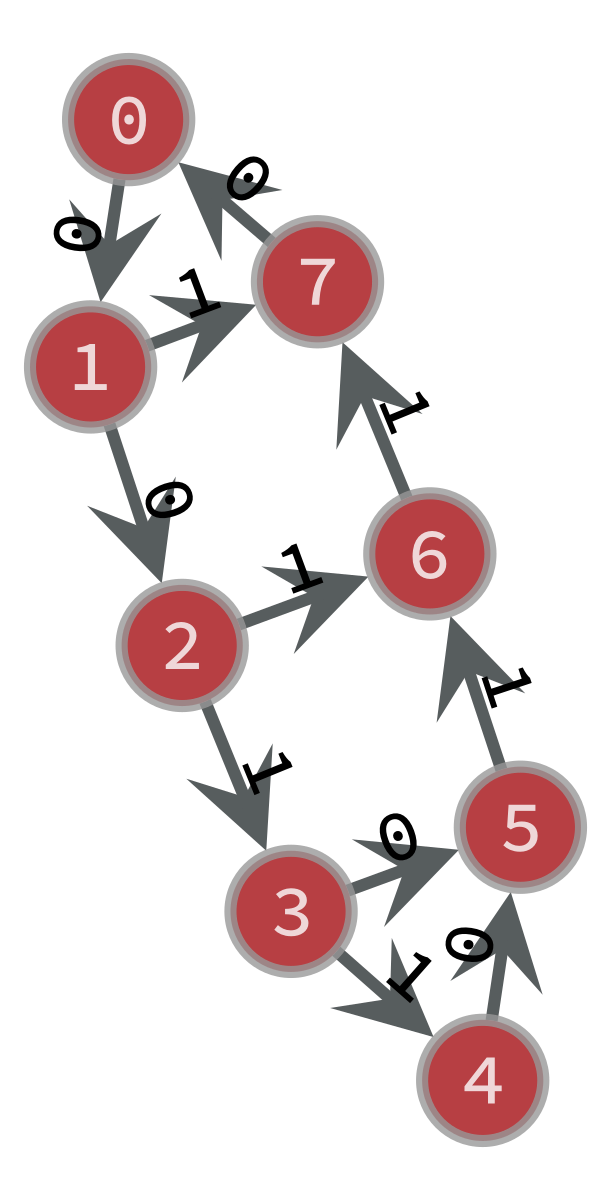

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f1eabc4dfd0, at 0x7f1eabc2c2b0>

In [28]:
#New Graph Gr
gt.graph_draw(gFinal, vertex_text=gFinal.vertex_index, edge_text=gFinal.ep.weight)

# Algorithm CP

## Get Sub Graph 0 (graph with only edges of weight 0)

[[<Vertex object with index '1' at 0x7f1eabc5d090>, <Vertex object with index '7' at 0x7f1eabc5d270>], [<Vertex object with index '2' at 0x7f1eabc5d2d0>, <Vertex object with index '6' at 0x7f1eabc5d330>], [<Vertex object with index '2' at 0x7f1eabc5d390>, <Vertex object with index '3' at 0x7f1eabc5d3f0>], [<Vertex object with index '3' at 0x7f1eabc5d450>, <Vertex object with index '4' at 0x7f1eabc5d4b0>], [<Vertex object with index '5' at 0x7f1eabc5d510>, <Vertex object with index '6' at 0x7f1eabc5d570>], [<Vertex object with index '6' at 0x7f1eabc5d5d0>, <Vertex object with index '7' at 0x7f1eabc5d9f0>]]
6
1
7


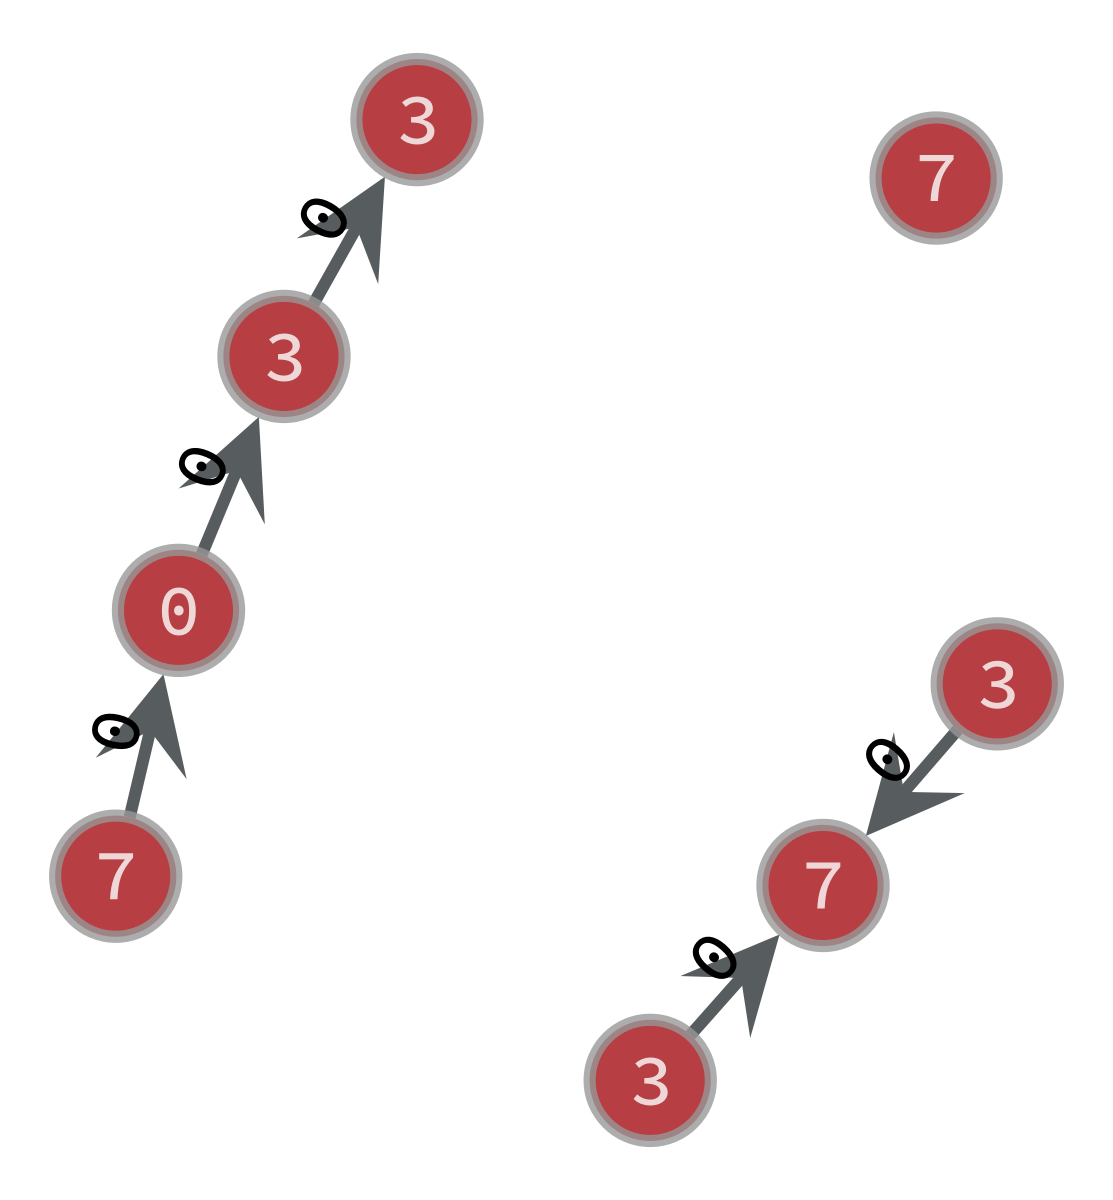

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f1eabc57c70, at 0x7f1eabc577c0>

In [29]:
g0 = gt.Graph(gFinal)

removedEdges = []

for edge in g0.edges():
    if (g0.ep.weight[edge]!=0):
        removedEdges.append([edge.source(),edge.target()])

print(removedEdges)
print(len(removedEdges))

delta = g0.new_vertex_property("int") #Property delta(node) in the reference paper.

for i in range(len(list(g0.vertices()))):
    delta[i] = 0

g0.vertex_properties["delta"] = delta

print(removedEdges[0][0])
print(removedEdges[0][1])

for i in range(len(removedEdges)):
    g0.remove_edge(g0.edge(removedEdges[i][0], removedEdges[i][1]))

gt.graph_draw(g0, vertex_text=g0.vp.cap, edge_text=g0.ep.weight)

## Get Topological Sort

In [25]:
#Topological Sort
sortedGraph = gt.Graph(g0)
tree = gt.min_spanning_tree(g0)
g0.set_edge_filter(tree)
sort = gt.topological_sort(g0)
print(sort)

[7 6 4 3 5 0 1 2]


## Calculate Clock Period of the Graph

In [26]:
for node in sort:
    
    if (g0.vertex(node).in_degree()==0): #If the node doesn't have incoming edges. 
        g0.vp.delta[node] = g0.vp.cap[node]
    else:
        maxDelta = 0
        for edge in g0.vertex(node).in_edges():
            if (g0.vp.delta[g0.vertex(edge.source())] > maxDelta):
                maxDelta = g0.vp.delta[g0.vertex(edge.source())]
                
        g0.vp.delta[node] = g0.vp.cap[node] + maxDelta
            
    #print(g0.vp.delta[node])

clockPeriod = 0
for node in sort:
    if (g0.vp.delta[node] > clockPeriod): #Update clock period 
        clockPeriod = g0.vp.delta[node]

print("Clock Period of the graph is: " + str(clockPeriod))

Clock Period of the graph is: 13
